# A. Build a sequential model using Keras on top of this Diabetes dataset to find out if the patient has diabetes or not, using ‘Pregnancies’, ‘Glucose’ & ‘BloodPressure’ as independent columns.
## a. This model should have 1 hidden layer with 8 nodes
## b. Use Stochastic Gradient as the optimization algorithm
## c. Fit the model, with number of epochs to be 100 and batch size to be 10

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import L1L2
from sklearn.preprocessing import StandardScaler

In [202]:
data = pd.read_csv('diabetes.csv')

In [203]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [204]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure']]
y = data['Outcome']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22)

In [206]:
X_train.shape

(537, 3)

In [207]:
X_test.shape

(231, 3)

In [208]:
model = Sequential()

In [209]:
model.add(Input(3,))

In [210]:
model.add(Dense(units=8, activation='relu')) #1 hidden layer with 8 nodes, also creates input layer of shape(3,)

In [211]:
model.add(Dense(1, activation='sigmoid')) #Output layer

In [212]:
model.compile(optimizer=SGD(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

In [213]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test, y_test), batch_size=10)

Epoch 1/100
54/54 [==============================] - 1s 12ms/step - loss: 4.1922 - accuracy: 0.6223 - val_loss: 0.6629 - val_accuracy: 0.6753
Epoch 2/100
54/54 [==============================] - 0s 9ms/step - loss: 0.6600 - accuracy: 0.6852 - val_loss: 0.6455 - val_accuracy: 0.6710
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.6097 - accuracy: 0.6745 - val_loss: 0.6383 - val_accuracy: 0.6970
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.5951 - accuracy: 0.6967 - val_loss: 0.6348 - val_accuracy: 0.6580
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.6020 - accuracy: 0.6627 - val_loss: 0.6294 - val_accuracy: 0.6710
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 0.6141 - accuracy: 0.6500 - val_loss: 0.6308 - val_accuracy: 0.6623
Epoch 7/100
54/54 [==============================] - 0s 9ms/step - loss: 0.5948 - accuracy: 0.6965 - val_loss: 0.6257 - val_accuracy: 0.6710
Epoch 8/100


Epoch 59/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.6380 - val_loss: 0.6250 - val_accuracy: 0.6667
Epoch 60/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6229 - accuracy: 0.6544 - val_loss: 0.6036 - val_accuracy: 0.7143
Epoch 61/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6134 - accuracy: 0.6797 - val_loss: 0.6036 - val_accuracy: 0.6926
Epoch 62/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5777 - accuracy: 0.6744 - val_loss: 0.6071 - val_accuracy: 0.6797
Epoch 63/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6010 - accuracy: 0.6739 - val_loss: 0.6622 - val_accuracy: 0.6840
Epoch 64/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6030 - accuracy: 0.7116 - val_loss: 0.6232 - val_accuracy: 0.6926
Epoch 65/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6331 - accuracy: 0.6384 - val_loss: 0.6069 - val_accuracy: 0.6970
Epoch 

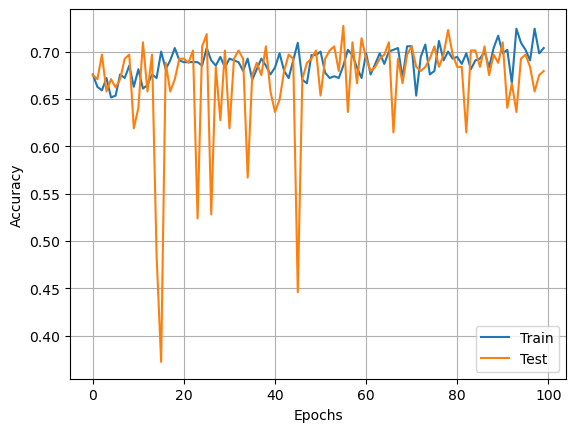

In [214]:
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim((0.64,0.67))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

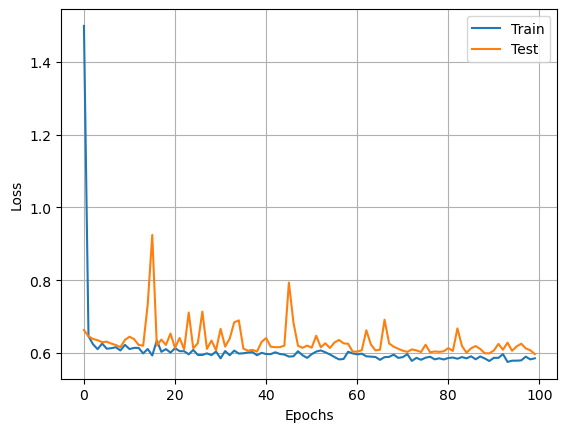

In [215]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.ylim((0,250))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [218]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 8)                 32        
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [219]:
from sklearn.preprocessing import StandardScaler

In [220]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [221]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [222]:
model2 = Sequential()

In [223]:
model2.add(Input(3,))
model2.add(Dense(units=8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [224]:
model2.compile(optimizer=SGD(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

In [225]:
model2.fit(x=X_train_sc,y=y_train,epochs=100,validation_data=(X_test_sc, y_test), batch_size=10)

Epoch 1/100
54/54 [==============================] - 1s 13ms/step - loss: 0.7429 - accuracy: 0.5622 - val_loss: 0.7182 - val_accuracy: 0.5931
Epoch 2/100
54/54 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6214 - val_loss: 0.6958 - val_accuracy: 0.5974
Epoch 3/100
54/54 [==============================] - 1s 9ms/step - loss: 0.6630 - accuracy: 0.6240 - val_loss: 0.6769 - val_accuracy: 0.6061
Epoch 4/100
54/54 [==============================] - 0s 9ms/step - loss: 0.6347 - accuracy: 0.6415 - val_loss: 0.6608 - val_accuracy: 0.6017
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.5906 - val_loss: 0.6468 - val_accuracy: 0.6190
Epoch 6/100
54/54 [==============================] - 1s 10ms/step - loss: 0.6509 - accuracy: 0.5703 - val_loss: 0.6340 - val_accuracy: 0.6190
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.6202 - accuracy: 0.6041 - val_loss: 0.6228 - val_accuracy: 0.6190
Epoch 8/100

Epoch 59/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5291 - accuracy: 0.7515 - val_loss: 0.5330 - val_accuracy: 0.7446
Epoch 60/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4699 - accuracy: 0.7755 - val_loss: 0.5329 - val_accuracy: 0.7446
Epoch 61/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5057 - accuracy: 0.7604 - val_loss: 0.5328 - val_accuracy: 0.7446
Epoch 62/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5350 - accuracy: 0.7399 - val_loss: 0.5328 - val_accuracy: 0.7489
Epoch 63/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5319 - accuracy: 0.7428 - val_loss: 0.5327 - val_accuracy: 0.7489
Epoch 64/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5012 - accuracy: 0.7541 - val_loss: 0.5327 - val_accuracy: 0.7489
Epoch 65/100
54/54 [==============================] - 0s 8ms/step - loss: 0.5100 - accuracy: 0.7473 - val_loss: 0.5326 - val_accuracy: 0.7489
Epoch 

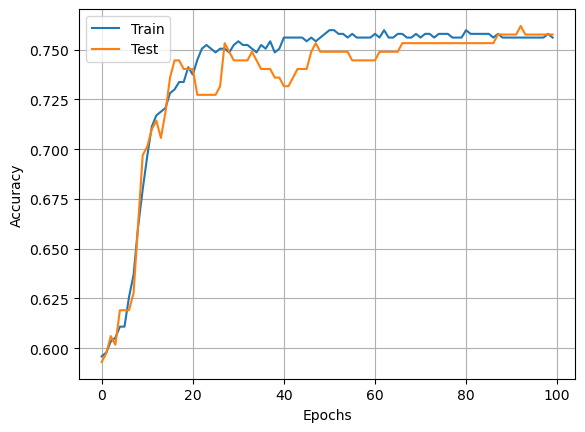

In [226]:
train_acc = model2.history.history["accuracy"]
val_acc = model2.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim((0.64,0.8))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

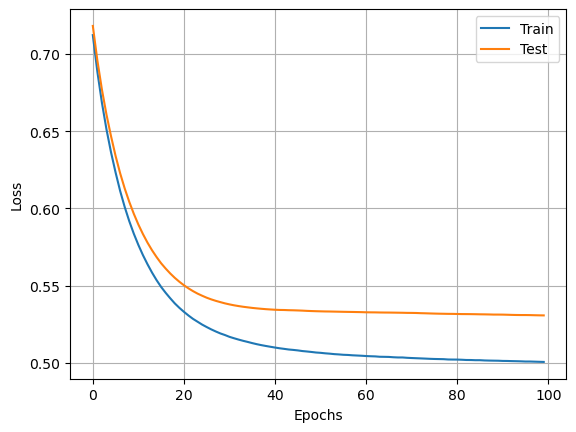

In [227]:
train_loss = model2.history.history["loss"]
val_loss = model2.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim((0.4,0.7))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [228]:
model2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 8)                 32        
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


# B. Build another sequential model where ‘Outcome’ is the dependent variable and all other columns are predictors.
## a. This model should have 3 hidden layers with 16 nodes in each layer
## b. Use ‘adam’ as the optimization algorithm
## c. Fit the model, with number of epochs to be 150 and batch size to be 10

In [229]:
X = data.drop('Outcome', axis=1)  # Use all columns except 'Outcome' as predictors
y = data['Outcome']

In [230]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [231]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [233]:
X_train.shape

(537, 8)

In [234]:
X_test.shape

(231, 8)

In [235]:
model3= Sequential()

In [236]:
model3.add(Input(8,))

In [237]:
model3.add(Dense(16, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(16, activation='relu'))

In [238]:
model3.add(Dense(1, activation='sigmoid'))

In [239]:
model3.compile(optimizer=Adam(learning_rate=0.006), loss='binary_crossentropy', metrics=['accuracy'])

In [240]:
model3.fit(x=X_train,y=y_train,epochs=150,validation_data=(X_test, y_test), batch_size=10)

Epoch 1/150
54/54 [==============================] - 2s 13ms/step - loss: 2.1654 - accuracy: 0.5796 - val_loss: 0.9255 - val_accuracy: 0.5974
Epoch 2/150
54/54 [==============================] - 1s 10ms/step - loss: 0.7601 - accuracy: 0.6442 - val_loss: 0.6471 - val_accuracy: 0.6450
Epoch 3/150
54/54 [==============================] - 1s 10ms/step - loss: 0.6822 - accuracy: 0.6304 - val_loss: 0.6498 - val_accuracy: 0.6407
Epoch 4/150
54/54 [==============================] - 1s 10ms/step - loss: 0.6660 - accuracy: 0.6411 - val_loss: 0.6077 - val_accuracy: 0.6753
Epoch 5/150
54/54 [==============================] - 1s 9ms/step - loss: 0.6141 - accuracy: 0.6809 - val_loss: 0.6086 - val_accuracy: 0.6926
Epoch 6/150
54/54 [==============================] - 1s 10ms/step - loss: 0.5931 - accuracy: 0.7113 - val_loss: 0.6432 - val_accuracy: 0.6104
Epoch 7/150
54/54 [==============================] - 1s 9ms/step - loss: 0.6202 - accuracy: 0.6535 - val_loss: 0.6487 - val_accuracy: 0.6104
Epoch 8/

54/54 [==============================] - 1s 11ms/step - loss: 0.4653 - accuracy: 0.7932 - val_loss: 0.7038 - val_accuracy: 0.6407
Epoch 59/150
54/54 [==============================] - 1s 10ms/step - loss: 0.5086 - accuracy: 0.7525 - val_loss: 0.7026 - val_accuracy: 0.6883
Epoch 60/150
54/54 [==============================] - 1s 10ms/step - loss: 0.5234 - accuracy: 0.7466 - val_loss: 0.6801 - val_accuracy: 0.7056
Epoch 61/150
54/54 [==============================] - 1s 10ms/step - loss: 0.5227 - accuracy: 0.7640 - val_loss: 0.5710 - val_accuracy: 0.7056
Epoch 62/150
54/54 [==============================] - 1s 10ms/step - loss: 0.4496 - accuracy: 0.7936 - val_loss: 0.5753 - val_accuracy: 0.7013
Epoch 63/150
54/54 [==============================] - 1s 10ms/step - loss: 0.5123 - accuracy: 0.7286 - val_loss: 0.5916 - val_accuracy: 0.7013
Epoch 64/150
54/54 [==============================] - 1s 10ms/step - loss: 0.4975 - accuracy: 0.7431 - val_loss: 0.5948 - val_accuracy: 0.6926
Epoch 65/150

54/54 [==============================] - 1s 10ms/step - loss: 0.4682 - accuracy: 0.7651 - val_loss: 0.6892 - val_accuracy: 0.6797
Epoch 116/150
54/54 [==============================] - 1s 10ms/step - loss: 0.4639 - accuracy: 0.7878 - val_loss: 0.6584 - val_accuracy: 0.6753
Epoch 117/150
54/54 [==============================] - 1s 10ms/step - loss: 0.4320 - accuracy: 0.7842 - val_loss: 0.7868 - val_accuracy: 0.7229
Epoch 118/150
54/54 [==============================] - 1s 10ms/step - loss: 0.4741 - accuracy: 0.7851 - val_loss: 0.5904 - val_accuracy: 0.7316
Epoch 119/150
54/54 [==============================] - 1s 10ms/step - loss: 0.4101 - accuracy: 0.7876 - val_loss: 0.6243 - val_accuracy: 0.6970
Epoch 120/150
54/54 [==============================] - 1s 9ms/step - loss: 0.4080 - accuracy: 0.8117 - val_loss: 0.6451 - val_accuracy: 0.6883
Epoch 121/150
54/54 [==============================] - 1s 10ms/step - loss: 0.4267 - accuracy: 0.8069 - val_loss: 0.6404 - val_accuracy: 0.7143
Epoch 1

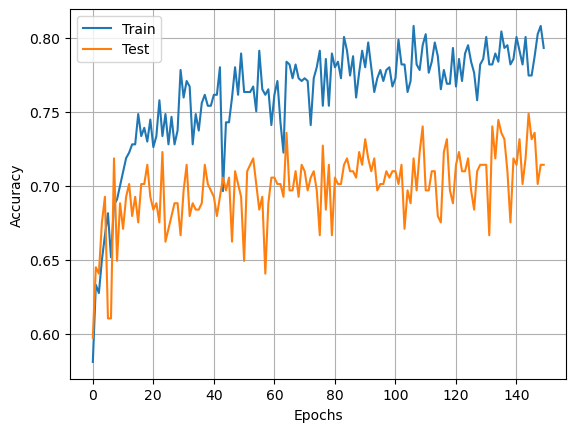

In [241]:
train_acc = model3.history.history["accuracy"]
val_acc = model3.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim((0.64,0.8))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

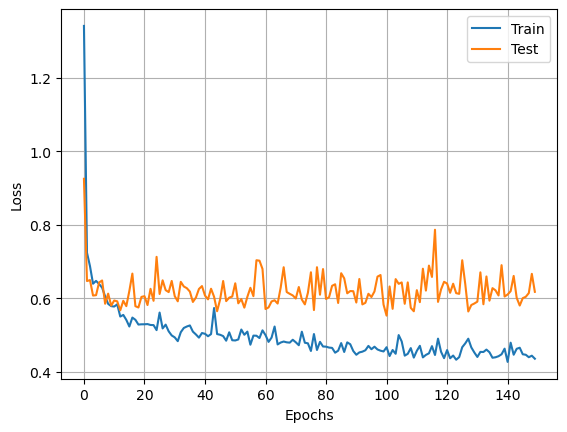

In [242]:
train_loss = model3.history.history["loss"]
val_loss = model3.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim((0.4,0.7))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [243]:
model3.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_105 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_106 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 17        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [244]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [245]:
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

In [262]:
model4= Sequential()
model4.add(Input(8,))

In [263]:
model4.add(Dense(16, activation='relu'))
model4.add(Dense(16, activation='tanh'))
model4.add(Dense(16, activation='tanh', kernel_regularizer = L1L2(l1=0.9, l2=0.1)))
#, kernel_regularizer = L1L2(l1=0.4, l2=0.6)
model4.add(Dropout(0.1))

In [264]:
model4.add(Dense(1, activation='sigmoid'))

In [265]:
model4.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [266]:
model4.fit(x=X_train_scale,y=y_train,epochs=150,validation_data=(X_test_scale, y_test), batch_size=10)

Epoch 1/150
54/54 [==============================] - 1s 14ms/step - loss: 28.5559 - accuracy: 0.7360 - val_loss: 1.7767 - val_accuracy: 0.6494
Epoch 2/150
54/54 [==============================] - 1s 11ms/step - loss: 1.3246 - accuracy: 0.6756 - val_loss: 0.9532 - val_accuracy: 0.6494
Epoch 3/150
54/54 [==============================] - 1s 11ms/step - loss: 0.9260 - accuracy: 0.6742 - val_loss: 0.9491 - val_accuracy: 0.6494
Epoch 4/150
54/54 [==============================] - 1s 12ms/step - loss: 0.9258 - accuracy: 0.6704 - val_loss: 0.9516 - val_accuracy: 0.6494
Epoch 5/150
54/54 [==============================] - 1s 10ms/step - loss: 0.9217 - accuracy: 0.7000 - val_loss: 0.9270 - val_accuracy: 0.6494
Epoch 6/150
54/54 [==============================] - 1s 11ms/step - loss: 0.9296 - accuracy: 0.6494 - val_loss: 0.9375 - val_accuracy: 0.6494
Epoch 7/150
54/54 [==============================] - 1s 11ms/step - loss: 0.9310 - accuracy: 0.6568 - val_loss: 0.9224 - val_accuracy: 0.6494
Epoch

54/54 [==============================] - 1s 10ms/step - loss: 0.8222 - accuracy: 0.8029 - val_loss: 0.9090 - val_accuracy: 0.7619
Epoch 59/150
54/54 [==============================] - 1s 10ms/step - loss: 0.8170 - accuracy: 0.8514 - val_loss: 0.9432 - val_accuracy: 0.7489
Epoch 60/150
54/54 [==============================] - 1s 11ms/step - loss: 0.8167 - accuracy: 0.8234 - val_loss: 1.3019 - val_accuracy: 0.7532
Epoch 61/150
54/54 [==============================] - 1s 11ms/step - loss: 0.9679 - accuracy: 0.8175 - val_loss: 0.8783 - val_accuracy: 0.7662
Epoch 62/150
54/54 [==============================] - 1s 10ms/step - loss: 0.8324 - accuracy: 0.8342 - val_loss: 0.8629 - val_accuracy: 0.7532
Epoch 63/150
54/54 [==============================] - 1s 11ms/step - loss: 0.8286 - accuracy: 0.8012 - val_loss: 0.9416 - val_accuracy: 0.7446
Epoch 64/150
54/54 [==============================] - 1s 10ms/step - loss: 0.8411 - accuracy: 0.8047 - val_loss: 0.9738 - val_accuracy: 0.6450
Epoch 65/150

54/54 [==============================] - 1s 10ms/step - loss: 0.7186 - accuracy: 0.8643 - val_loss: 0.8649 - val_accuracy: 0.7619
Epoch 116/150
54/54 [==============================] - 1s 10ms/step - loss: 0.7417 - accuracy: 0.8363 - val_loss: 0.8785 - val_accuracy: 0.7619
Epoch 117/150
54/54 [==============================] - 1s 10ms/step - loss: 0.7405 - accuracy: 0.8400 - val_loss: 0.8673 - val_accuracy: 0.7532
Epoch 118/150
54/54 [==============================] - 1s 10ms/step - loss: 0.7355 - accuracy: 0.8542 - val_loss: 0.8621 - val_accuracy: 0.7749
Epoch 119/150
54/54 [==============================] - 1s 10ms/step - loss: 0.7745 - accuracy: 0.8362 - val_loss: 1.1660 - val_accuracy: 0.7446
Epoch 120/150
54/54 [==============================] - 1s 10ms/step - loss: 0.9650 - accuracy: 0.7746 - val_loss: 0.8958 - val_accuracy: 0.7879
Epoch 121/150
54/54 [==============================] - 1s 10ms/step - loss: 0.7653 - accuracy: 0.8449 - val_loss: 0.8556 - val_accuracy: 0.7359
Epoch 

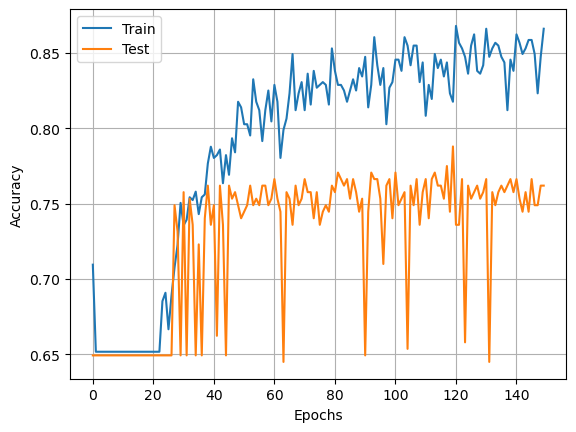

In [267]:
train_acc = model4.history.history["accuracy"]
val_acc = model4.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim((0.6,1))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

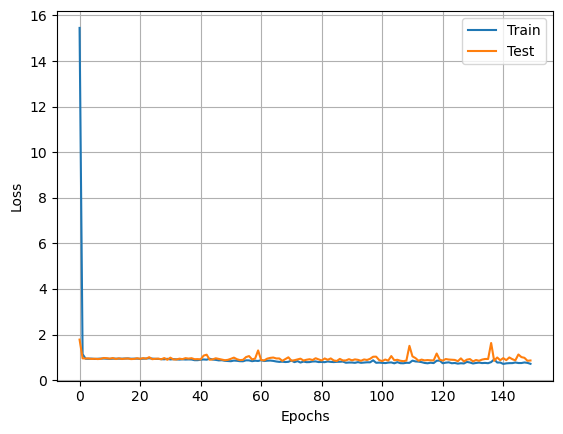

In [268]:
train_loss = model4.history.history["loss"]
val_loss = model4.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim((0.4,0.7))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [269]:
model4.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_117 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_118 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 17        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________
